In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk3-task1-spills.ipynb")

# Task 1: Visualizing oil spills in NY State

## Instructions

- First, update the following cell to have a link to *your* Homework 3 GitHub repository:

**UPDATE THIS LINK**
https://github.com/mmyiv/eds220-hwk3


- Review the [complete rubric for this task](https://docs.google.com/document/d/1Ce4EO3MEHW5uLks4x8BECWlkim2bcmxB4f8Qo4z26z8/edit?usp=sharing) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

- Delete all the comments initially included in this notebook (ex: `# Your code here`).


## About the data
In this task you will use two datsets:

### First dataset: oil spills data

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
You can find extra information and metadata for this dataset in the `NYSDEC_SpillIncidents_Overview.pdf` and `NYSDEC_SpillIncidents_DataDictionary.pdf` documents available at the portal.

### Second dataset: TIGER shapefile

The second dataset is the [the 2023 Counties (and equivalent) TIGER shapefile](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) from the Census Bureau. You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 


## 1. File management
a. Create a `data/` directory inside your `eds220-hwk3` directory. If you download any data, it should be transferred into this folder. 

b. Add the `data/` directory to your `.gitignore` file and push your changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam your `git` workflow if you try to push them. Your `data/` directory should not be in your GitHub repository.

## 2. Datasets description
Read the metadata for both datsets and write a description about each one. Indicate the date sources and date of access.


Oil Spills data:

Description: This data set includes information of spills of hazardous materials in the state of New York. In addition to the date and material spilled, information about the party responsible is also included, such as location of occurance and the reason behind the spill.

Data Source:
New York State Department of Environmental Conservation (2015) Spill Incidents. [Link to data source](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk/about_data)
Date of Access: 11/02/2024



Tiger Shapefile:

Description: These data set includes information about states as of January 1st, 2023. The data set used in this exercise describes County boundaries in the United States. In addition to that, information about the county such as name, identifications for geographic identity, and geometry are included. 

Data Source:
United States Census Bureau (2023.) TIGER/Line Shapefiles. [Link to data source](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2023.html#list-tab-790442341)
Date of Access: 11/02/2024



## 3. Import libraries

In [2]:
# Import libraries
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

## 4. Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties data as a variable named `counties`.

If you are using file paths to access the data, these should be constructed using the `os` package.

In [3]:
# Check current working directory to set file path
os.getcwd()

'/Users/mmyiv/MEDS/EDS-220/eds220-2024-hw/eds220-hwk3'

In [4]:
# Read in data
spills = pd.read_csv('data/Spill_Incidents.csv')

# Create an abosulute file path for reading in counties data
fp = os.path.join('data',
                  'counties',
                  'tl_2023_us_county.shp')
counties = gpd.read_file(fp)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/share/proj failed


## 5. Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you information you will need to use in the next exercises.

### 5.A. Exploration

In the next cells:

a. Check the dataframe's head.

b. Check the data types of the columns.

c. Check the unique values in the `material_family` column.

d. Check the unique values in the `county` column.

You can add other cells for preliminary data exploration.

In [5]:
# a. Check the first five rows of the data frame spills
spills.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


In [6]:
# b. Check the data type of the data frame spills
spills.dtypes

Spill Number               int64
Program Facility Name     object
Street 1                  object
Street 2                  object
Locality                  object
County                    object
ZIP Code                  object
SWIS Code                  int64
DEC Region                 int64
Spill Date                object
Received Date             object
Contributing Factor       object
Waterbody                 object
Source                    object
Close Date                object
Material Name             object
Material Family           object
Quantity                 float64
Units                     object
Recovered                float64
dtype: object

In [7]:
# c. Find unique values in the 'material_family' column of the data frame spills
spills['Material Family'].unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [8]:
# d. Find unique values in the county column in spills data frame
spills['County'].unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'Schuyler', 'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex',
       'Chenango', 'Erie', 'Livingston', 'Wayne', 'Suffolk', 'Orleans',
       'Ontario', 'Genesee', 'Otsego', 'Tompkins', 'Madison', 'Chemung',
       'Seneca', 'Oneida', 'Broome', 'Hamilton', 'Washington', 'Franklin',
       'Columbia', 'Fulton', 'Herkimer', 'Schoharie', 'Rensselaer',
       'Montgomery', 'Putnam', 'Delaware', 'New Jersey - Region 2',
       'Steuben', 'Tioga', 'Chautauqua', 'Cattaraugus', 'Wyoming',
       'Yates', 'Greene', 'Pennsylvania - Region 9', 'Allegany',
       'New Jersey - Region 3 (N)', 'Cattaraugus Indian Reservation',
       'New Jersey - Region 3 (T)', 'Canada - Region 6',
       'Canada - Region 9', 'Pennsyl

<!-- BEGIN QUESTION -->

f. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

<!-- END QUESTION -->

*Your answer here.*

Through preliminary exploration, I learned about column names which I would need to clean in order to easily call them for later use. Checking the types of each column also lets me know if converting data types is necessary, for example changinga date column to datetime format or ensuring a name is in string format. Finally, checking for unique values in both Material Family and County tells me how many hazardous materials there are and that there are different regions for specific counties.

### 5.B. Cleaning
a. Simplify column names as needed.

b. Update column data types as needed. If you're not sure if any data types are needed at this point, you may come back later to this cell.

In [9]:
# a. Simplify column names to lower case and include "_" for spaces
spills.columns = spills.columns.str.lower().str.replace(" ", "_")

In [10]:
# b. Change 'spill_date' column to datetime format
spills['spill_date'] = pd.to_datetime(spills.spill_date)

### 5.C. Data selection

a. Select data about petroleum spills that took place between January 1st 2023, and October 31st 2023 (including both dates). Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells as needed.

In [11]:
# a. Select petroleum spills data from 2023-01-01 to 2023-10-31
petr_23 = spills[(spills['spill_date'].between('2023-01-01', '2023-10-31', inclusive = 'both')) & (spills['material_family'] == 'Petroleum')]

<!-- BEGIN QUESTION -->

b. Use `print()` and f-strings to print messages verifying that `petr_23` only has data for 2023 and from January through October.
HINT: [pandas.Series.dt.year](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html) and [pandas.Series.dt.month](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html).

In [12]:
# b. Make a message to ensure data was filtered properly
print(f"Year of petr_23 is 2023: {petr_23['spill_date'].dt.year.unique()}")
print(f"Month of petr_23 is within range: {petr_23['spill_date'].dt.month.unique()}")

Year of petr_23 is 2023: [2023]
Month of petr_23 is within range: [ 6  8  9  7  1  2  3 10  5  4]


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Write tests using `assert` to verify that `petr_23` only has data for petroleum spills.

In [13]:
# c. Make a test to assert that the data frame only has petroleum material
assert (petr_23['material_family'] == 'Petroleum').all()

<!-- END QUESTION -->

### 5.D. Data aggregation

Create new data frame named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Data frame has two columns only:
    - Column one: county names, column name = `county`
    - Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if needed.


In [14]:
# Find number of petroleum spills per county
spills_per_county = petr_23.groupby('county')['material_family'].count().reset_index(name='n_spills')

# Verify changes
spills_per_county

,county,n_spills
0,Albany,205
1,Allegany,30
2,Bronx,143
3,Broome,75
4,Cattaraugus,47
...,...,...
59,Washington,96
60,Wayne,38
61,Westchester,743
62,Wyoming,24


## 6. Prepare counties data

This section refers to the `counties` geo-dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### 6.A. Exploration

In the next cells:

a. Check the geo-dataframe's head.

b. Check the data types of the columns.

c. Check the geo-dataframe's CRS.

d. Plot the geo-dataframe.

You can add any other cells of preliminary data exploration.

In [15]:
# a. View the first few rows of the geo-data frame
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [16]:
# b. Check the data types for each column
counties.dtypes

STATEFP       object
COUNTYFP      object
COUNTYNS      object
GEOID         object
GEOIDFQ       object
NAME          object
NAMELSAD      object
LSAD          object
CLASSFP       object
MTFCC         object
CSAFP         object
CBSAFP        object
METDIVFP      object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [17]:
# c. Check CRS of geo-data frame
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

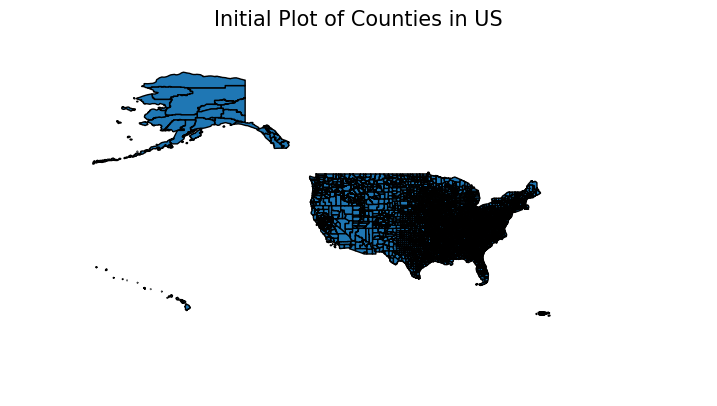

In [18]:
# d. Make an initial plot of the data
fig, ax = plt.subplots(figsize=(9,5))

# Remove the axis for a cleaner map
ax.axis('off')

# Title for the plot
ax.set_title('Initial Plot of Counties in US', 
              fontsize=15)

counties.plot(ax=ax,
               edgecolor = 'black')

# Set limits for easier viewing
plt.xlim(-200, -25)
plt.ylim(0, 80)

plt.show()

In [19]:
# Check dimensions 
counties.shape

(3235, 19)

<!-- BEGIN QUESTION -->

f. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

*Your answer here.*

Through preliminary exploration, I got an overview of the column names and what type of information to expect from 'head()'. Checking column types lets me know if I need to convert any data types, and checking the CRs will be useful for matching the CRS of another data set. The inital plot and checking the shape allows me to double check that the counties are in the right place and that the data makes sense. 

<!-- END QUESTION -->

### 6.B. Cleaning

Simplify column names as needed.

In [20]:
# Simplify column names by changing to lower case and reassign to geo-dataframe
counties.columns = counties.columns.str.lower()

### 6.C. Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them.

<AxesSubplot:>

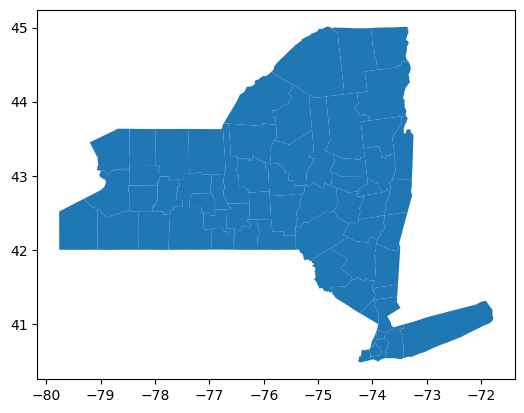

In [21]:
# Make a new column of only New York counties
ny_counties = counties[counties['statefp']=='36']

# Verify changes
ny_counties.head()

# View plot
ny_counties.plot()

In [22]:
# Verify changes
ny_counties.head()

,statefp,countyfp,countyns,geoid,geoidfq,name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
46,36,101,00974148,36101,0500000US36101,Steuben,Steuben County,06,H1,G4020,236,18500,None,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999..."
165,36,091,00974143,36091,0500000US36091,Saratoga,Saratoga County,06,H1,G4020,104,10580,None,A,2097812305,87488004,+43.1061353,-073.8553872,"POLYGON ((-73.67891 42.91221, -73.67938 42.911..."
173,36,003,00974100,36003,0500000US36003,Allegany,Allegany County,06,H1,G4020,None,None,None,A,2666409356,12990521,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518..."
203,36,075,00974136,36075,0500000US36075,Oswego,Oswego County,06,H1,G4020,532,45060,None,A,2464650884,933469962,+43.4614431,-076.2092618,"POLYGON ((-76.02509 43.70702, -76.02004 43.706..."
210,36,111,00974153,36111,0500000US36111,Ulster,Ulster County,06,H1,G4020,408,28740,None,A,2911757764,94596810,+41.9472124,-074.2654582,"POLYGON ((-74.07480 42.09659, -74.06441 42.120..."


## 7 Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### 7.A. Explore data

In the next cells:

a. Print the names of counties in `ny_counties`, without repetition.

b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.


In [23]:
# a. Print unique names of ny_counties
b=ny_counties['name'].unique()

In [24]:
# b. Print unique names of spills_per_county
a=spills_per_county['county'].unique()



c. Which are the county names that are in `spills_per_county`, but not in `ny_counties`? Your answer should be a list of strings
HINT: You can use the `numpy` function [`setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html), pay attention to the example in the documentation. Store your answer in the `diff_names` variable. 



In [25]:
# See counties in spills but not in NY
diff_names_spills = np.setdiff1d(a, b)

# Verify changes
diff_names_spills

array(['New Jersey - Region 2', 'St Lawrence',
       'Tuscarora Indian Reservation'], dtype=object)


d. Which are the county names that are in `ny_counties`, but not in `spills_per_county`? Your answer should be a list of strings.


In [26]:
# See counties in NY but not in spills
diff_names_ny = np.setdiff1d(ny_counties.name, spills_per_county.county)

# View changes
diff_names_ny

array(['St. Lawrence'], dtype=object)




e. What is the number of spills in 'Tuscarora Indian Reservation'?


In [27]:
# e. Find number of spills in 'Tuscarora Indian Reservation'
n_spills_tuscarora = spills_per_county[spills_per_county['county']== 'Tuscarora Indian Reservation']

# Show number of spills
n_spills_tuscarora['n_spills'].count()

1

### 7.B. Data updates

In the next cell, update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame and use an `assert` statement to verify that the update was successful.

You may add cells if needed.

In [28]:
# Update name of St Lawrence in spills data frame

# Find location
spills_per_county.tail(15)

# Ensure location
spills_per_county.at[50, 'county']

# Update name
spills_per_county.at[50, 'county'] = 'St. Lawrence'

# Confirm update
spills_per_county.loc[50]

county      St. Lawrence
n_spills              65
Name: 50, dtype: object

### 7.C. Merge

In the following cells:

a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 

b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.


In [29]:
# a. Update name column of ny_counties to county to match
ny_counties['county'] = ny_counties['name']

/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [30]:
# b. Make an inner join between spills by county and NY
ny_counties = pd.merge(spills_per_county, ny_counties, on = 'county', how = 'inner')

# Verify change
ny_counties.head()

,county,n_spills,statefp,countyfp,countyns,geoid,geoidfq,name,namelsad,lsad,...,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
0,Albany,205,36,001,00974099,36001,0500000US36001,Albany,Albany County,06,...,G4020,104,10580,None,A,1354273423,26971925,+42.5882401,-073.9740095,"POLYGON ((-73.96379 42.44162, -73.96666 42.441..."
1,Allegany,30,36,003,00974100,36003,0500000US36003,Allegany,Allegany County,06,...,G4020,None,None,None,A,2666409356,12990521,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518..."
2,Bronx,143,36,005,00974101,36005,0500000US36005,Bronx,Bronx County,06,...,G4020,408,35620,35614,C,109235672,39353304,+40.8487111,-073.8529390,"POLYGON ((-73.93381 40.88221, -73.93365 40.882..."
3,Broome,75,36,007,00974102,36007,0500000US36007,Broome,Broome County,06,...,G4020,None,13780,None,A,1827626589,25078245,+42.1619773,-075.8302833,"POLYGON ((-75.74223 41.99805, -75.75080 41.997..."
4,Cattaraugus,47,36,009,00974103,36009,0500000US36009,Cattaraugus,Cattaraugus County,06,...,G4020,160,36460,None,A,3388177068,36783591,+42.2390986,-078.6623320,"POLYGON ((-78.69725 41.99867, -78.69881 41.998..."



From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

c. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [31]:
# c. Add a spill to Niagra county

# Find row number of Niagara
ny_counties[ny_counties['county'].str.contains("Niagara")]

# Update number of spills in Niagara county
ny_counties.at[31, 'n_spills'] = 89

# Verify changes
ny_counties.at[31, 'n_spills']

89

<!-- BEGIN QUESTION -->

## 8. Map
a. Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should be polished and have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an [annotation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html) with the data source (New York State Department of Environmental Conservation) and date of access.



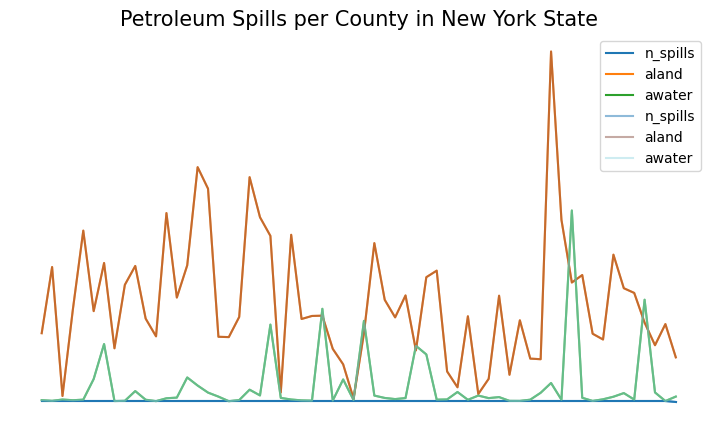

In [32]:
# a. Plot choropleth math of spills per county in NY 
fig, ax = plt.subplots(figsize=(9,5))

# Remove the axis for a cleaner map
ax.axis('off')

# Title for the plot
ax.set_title('Petroleum Spills per County in New York State', 
              fontsize=15)

# Add New York counties
ny_counties.plot(ax=ax)

# Spill number colored by energy source
ny_counties.plot(ax=ax,
                  column = 'n_spills',
                 legend=True,
                 markersize=4,
                 cmap='tab20',
                 alpha=0.5)

plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Write a figure description for the map, including tha names of the top 3 counties with the most petroleum spills. If you need to do additional data analysis to include relevant information from the data, you may include additional code cells here.

*Your answer here*